In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [31]:
housedf = pd.read_csv("Data/Housing_dataset_train.csv")
housedf.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [32]:
housedf.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [33]:
housedf.isnull().values.any()

True

In [34]:
housedf.isnull().sum().sum()

8950

In [35]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [36]:
housedf.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [37]:
housedf.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [38]:
bool_s = pd.isnull(housedf["parking_space"])
housedf[bool_s]

,ID,loc,title,bedroom,bathroom,parking_space,price
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
22,2223,Osun,Mansion,2.0,1.0,NaN,4163334.857
25,425,Nasarawa,Townhouse,5.0,2.0,NaN,2234301.476
34,5890,Yobe,Semi-detached duplex,9.0,3.0,NaN,2507303.272
35,11872,Edo,Mansion,5.0,6.0,NaN,4596234.296
...,...,...,...,...,...,...,...
13924,2655,Katsina,Cottage,2.0,2.0,NaN,1213625.061
13965,3921,Jigawa,Semi-detached duplex,1.0,2.0,NaN,1018987.766
13973,10100,Benue,Flat,8.0,2.0,NaN,2260692.663
13991,8857,Zamfara,NaN,4.0,7.0,NaN,1601556.469


In [39]:
housedf.isnull

<bound method DataFrame.isnull of           ID       loc                 title  bedroom  bathroom  \
0       3583   Katsina  Semi-detached duplex      2.0       2.0   
1       2748      Ondo             Apartment      NaN       2.0   
2       9261     Ekiti                   NaN      7.0       5.0   
3       2224   Anambra       Detached duplex      5.0       2.0   
4      10300      Kogi        Terrace duplex      NaN       5.0   
...      ...       ...                   ...      ...       ...   
13995   6175       Edo              Bungalow      NaN       7.0   
13996   9704    Kaduna             Apartment      NaN       7.0   
13997  11190   Plateau              Bungalow      8.0       6.0   
13998   9256     Delta                  Flat      NaN       6.0   
13999   8787  Nasarawa                   NaN      9.0       7.0   

       parking_space        price  
0                1.0  1149999.565  
1                4.0  1672416.689  
2                NaN  3364799.814  
3                

In [40]:
housedf.notnull

<bound method DataFrame.notnull of           ID       loc                 title  bedroom  bathroom  \
0       3583   Katsina  Semi-detached duplex      2.0       2.0   
1       2748      Ondo             Apartment      NaN       2.0   
2       9261     Ekiti                   NaN      7.0       5.0   
3       2224   Anambra       Detached duplex      5.0       2.0   
4      10300      Kogi        Terrace duplex      NaN       5.0   
...      ...       ...                   ...      ...       ...   
13995   6175       Edo              Bungalow      NaN       7.0   
13996   9704    Kaduna             Apartment      NaN       7.0   
13997  11190   Plateau              Bungalow      8.0       6.0   
13998   9256     Delta                  Flat      NaN       6.0   
13999   8787  Nasarawa                   NaN      9.0       7.0   

       parking_space        price  
0                1.0  1149999.565  
1                4.0  1672416.689  
2                NaN  3364799.814  
3               

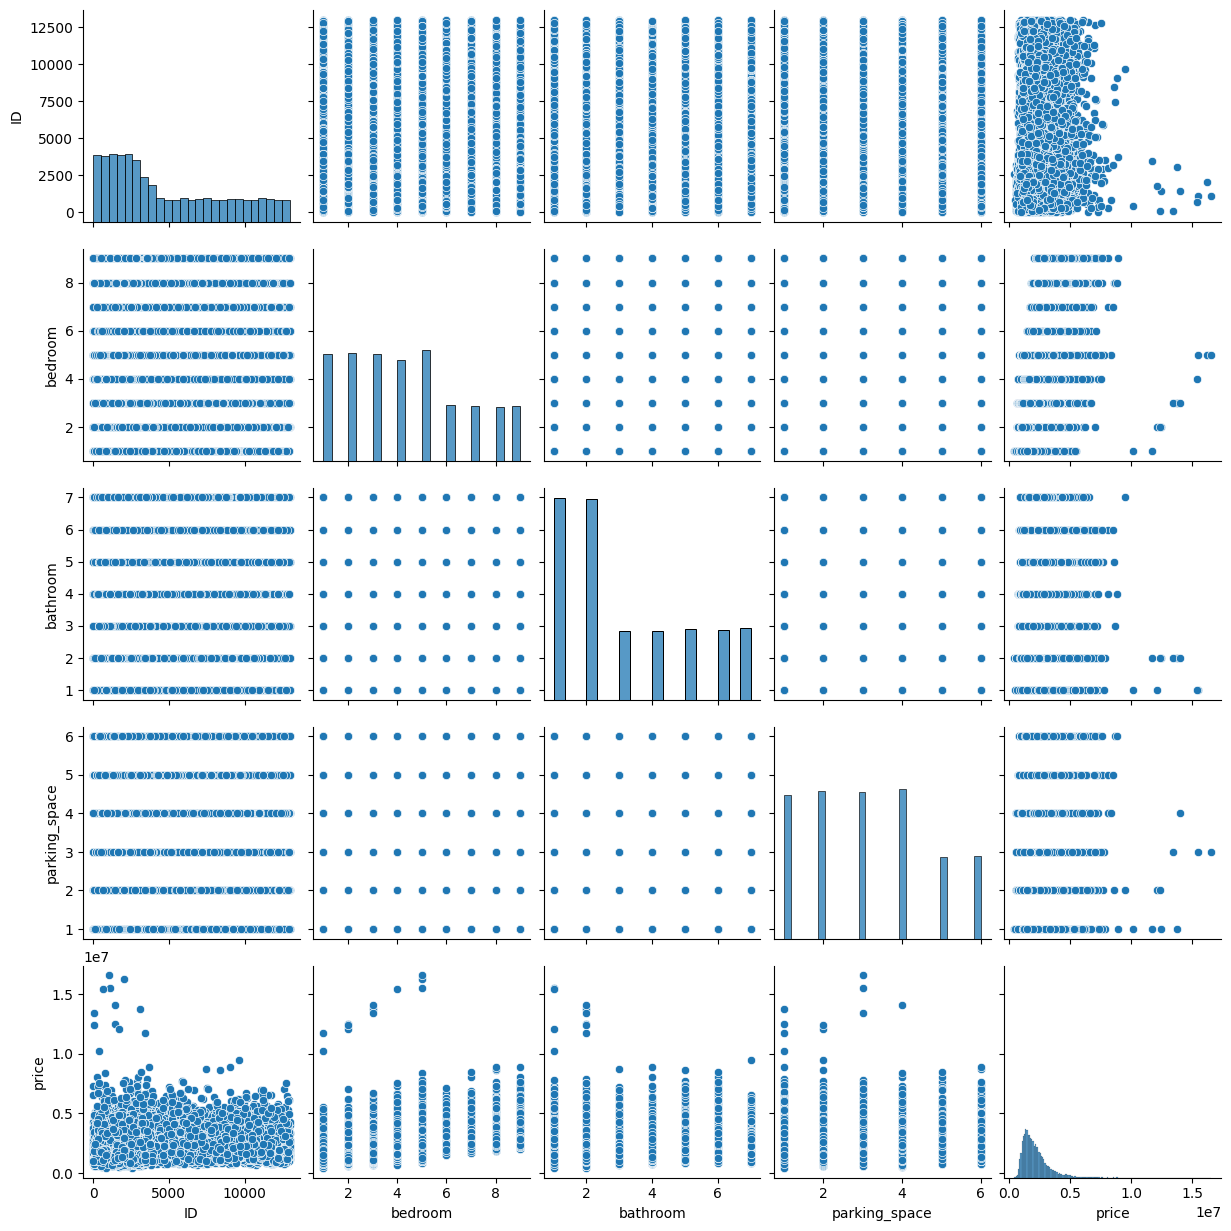

In [41]:
sns.pairplot(housedf)

In [42]:
housedf

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [43]:
housedf.notnull

<bound method DataFrame.notnull of           ID       loc                 title  bedroom  bathroom  \
0       3583   Katsina  Semi-detached duplex      2.0       2.0   
1       2748      Ondo             Apartment      NaN       2.0   
2       9261     Ekiti                   NaN      7.0       5.0   
3       2224   Anambra       Detached duplex      5.0       2.0   
4      10300      Kogi        Terrace duplex      NaN       5.0   
...      ...       ...                   ...      ...       ...   
13995   6175       Edo              Bungalow      NaN       7.0   
13996   9704    Kaduna             Apartment      NaN       7.0   
13997  11190   Plateau              Bungalow      8.0       6.0   
13998   9256     Delta                  Flat      NaN       6.0   
13999   8787  Nasarawa                   NaN      9.0       7.0   

       parking_space        price  
0                1.0  1149999.565  
1                4.0  1672416.689  
2                NaN  3364799.814  
3               